In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
import json
from data import *


In [2]:
def plotter_for_generic_dist(qgan_file, qcbm_file, ddqcl_file, mps_file, aclbm_file, data):
    with open(qgan_file + ".json", "rb") as qgan_f, \
        open(qcbm_file + ".json", "rb") as qcbm_f, \
        open(ddqcl_file + ".json", "rb") as ddqcl_f, \
        open(mps_file + ".json", "rb") as mps_f, \
        open(aclbm_file + ".json", "rb") as aclbm_f:
        
        qgan_results = json.load(qgan_f)
        qcbm_results = json.load(qcbm_f)
        ddqcl_results = json.load(ddqcl_f)
        mps_results = json.load(mps_f)
        aclbm_results = json.load(aclbm_f)

        qgan_kl_div = qgan_results['kl div']
        qcbm_kl_div = qcbm_results['kl div']
        ddqcl_kl_div = ddqcl_results['kl div']
        mps_kl_div = mps_results['kl div']
        aclbm_kl_div = aclbm_results['kl div']


        qgan_pmf = qgan_results['pmf']
        qcbm_pmf = qcbm_results['pmf']
        ddqcl_pmf = ddqcl_results['pmf']
        mps_pmf = mps_results['pmf']
        aclbm_pmf = aclbm_results['pmf']
        
    real_pmf = DATA_HUB[data].get_data()

    fig = plt.figure(figsize=(35, 3))
    gs = gridspec.GridSpec(1, 6, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[0, 3])
    ax5 = fig.add_subplot(gs[0, 4])
    ax6 = fig.add_subplot(gs[0, 5])
        
    ax1.semilogy(np.arange(len(qgan_kl_div)) + 1,               qgan_kl_div,               color="darkviolet", label="QGAN", alpha=0.6)
    ax1.semilogy(np.arange(len(qcbm_kl_div)) + 1,               qcbm_kl_div,               color="blue",       label="QCBM", alpha=0.6)
    ax1.semilogy(np.arange(len(ddqcl_kl_div)) + 1,              ddqcl_kl_div,              color="olivedrab",  label="DDQCL", alpha=0.6)
    ax1.semilogy(np.arange(len(mps_kl_div)) + 1,                mps_kl_div,                color="orange",     label="MPS", alpha=0.6)
    ax1.semilogy(np.arange(len(aclbm_kl_div["epoch"])) + 1, aclbm_kl_div["epoch"], color="red",        label="ACLBM", alpha=0.6)
    # ax1.plot(aclbm_kl_indices + 1,                          aclbm_kl_div["epoch"],     ls="",  color="red",        marker="x",   markersize=5)
    # ax1.set_ylim(bottom=0.0)
    ax1.set_title(f"KL divergence of dataset {data}")
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("KL divergence")
    ax1.grid(ls="--", alpha=0.7)
    ax1.legend()

    ax2.plot(np.arange(len(qgan_pmf)) + 1,  real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax2.bar(np.arange(len(qgan_pmf)) + 1,   qgan_pmf,  color="darkviolet", alpha=0.5)
    ax2.set_title(f"{data} PMF for QGAN")

    ax3.plot(np.arange(len(qcbm_pmf)) + 1,  real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax3.bar(np.arange(len(qcbm_pmf)) + 1,   qcbm_pmf,  color="blue",       alpha=0.5)
    ax3.set_title(f"{data} PMF for QCBM")
    ax3.set_yticks([])

    ax4.plot(np.arange(len(ddqcl_pmf)) + 1, real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax4.bar(np.arange(len(ddqcl_pmf)) + 1,  ddqcl_pmf, color="olivedrab",  alpha=0.5)
    ax4.set_title(f"{data} PMF for DDQCL")
    ax4.set_yticks([])

    ax5.plot(np.arange(len(mps_pmf)) + 1, real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax5.bar(np.arange(len(mps_pmf)) + 1,  mps_pmf, color="orange",        alpha=0.5)
    ax5.set_title(f"{data} PMF for MPS")
    ax5.set_yticks([])
    
    ax6.plot(np.arange(len(aclbm_pmf)) + 1, real_pmf,  color="black",      alpha=0.5, ls="--", lw=2)
    ax6.bar(np.arange(len(aclbm_pmf)) + 1,  aclbm_pmf, color="red",        alpha=0.5)
    ax6.set_title(f"{data} PMF for ACLBM")
    ax6.set_yticks([])

    ax2.set_ylim(top=0.004)
    ax3.set_ylim(top=0.004)
    ax4.set_ylim(top=0.004)
    ax5.set_ylim(top=0.004)
    ax6.set_ylim(top=0.004)

    plt.show()

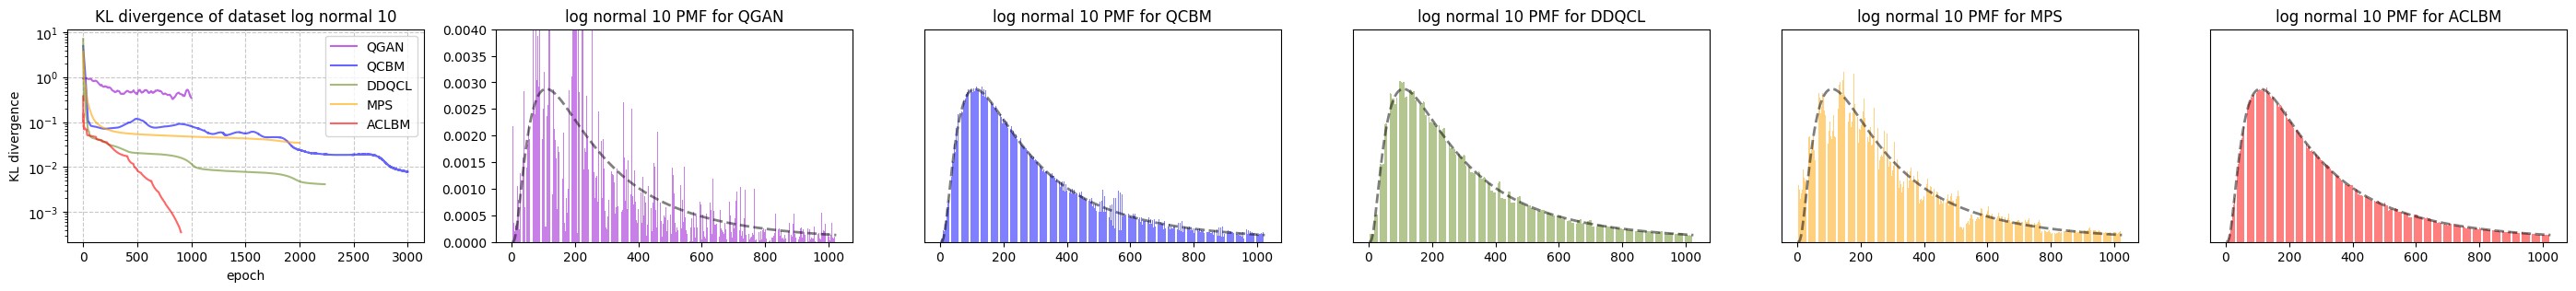

In [3]:
plotter_for_generic_dist(
    qgan_file="./results/QGAN/QGAN(data=log normal 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM/QCBM(data=log normal 10, lr=0.005, reps=5)",
    ddqcl_file="./results/DDQCL/DDQCL(data=log normal 10, lr=0.05, reps=5)",
    mps_file="./results/MPS/MPS(data=log normal 10, lr=0.01, reps=2)",
    aclbm_file="./results/ACLBM/ACLBM(data=log normal 10, No=3, t1=0.001, t2=0.005)",
    data="log normal 10",
)

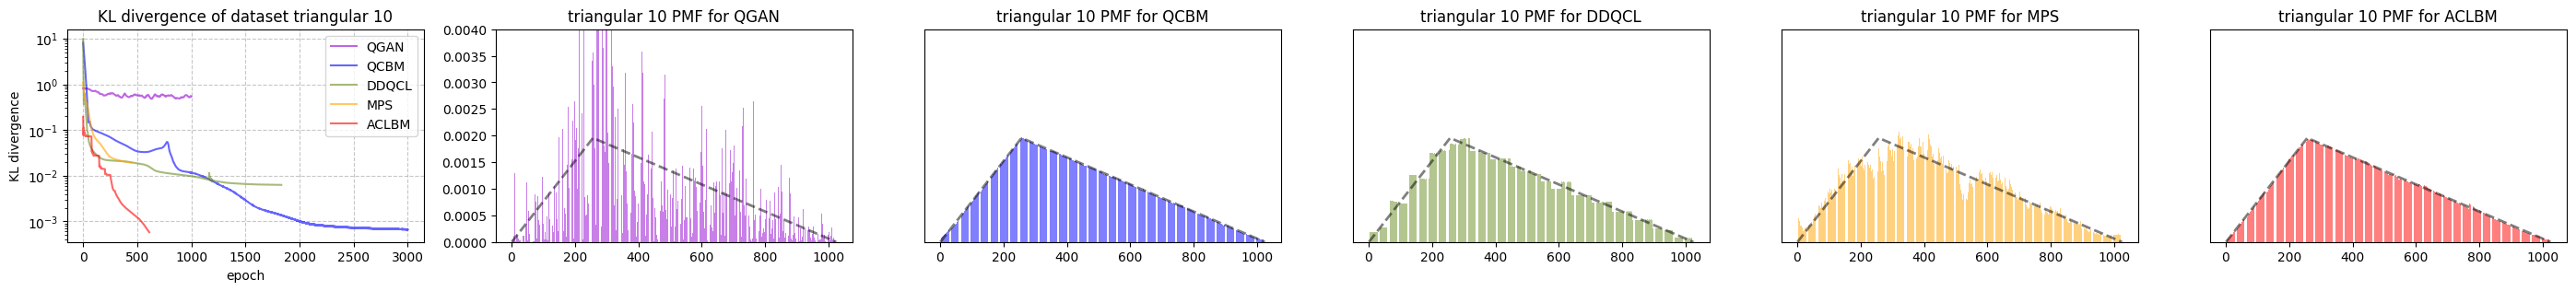

In [75]:
plotter_for_generic_dist(
    qgan_file="./results/QGAN/QGAN(data=triangular 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM/QCBM(data=triangular 10, lr=0.005, reps=5)",
    ddqcl_file="./results/DDQCL/DDQCL(data=triangular 10, lr=0.05, reps=5)",
    mps_file="./results/MPS/MPS(data=triangular 10, lr=0.01, reps=2)",
    aclbm_file="./results/ACLBM/ACLBM(data=triangular 10, No=3, t1=0.001, t2=0.005)",
    data="triangular 10",
)

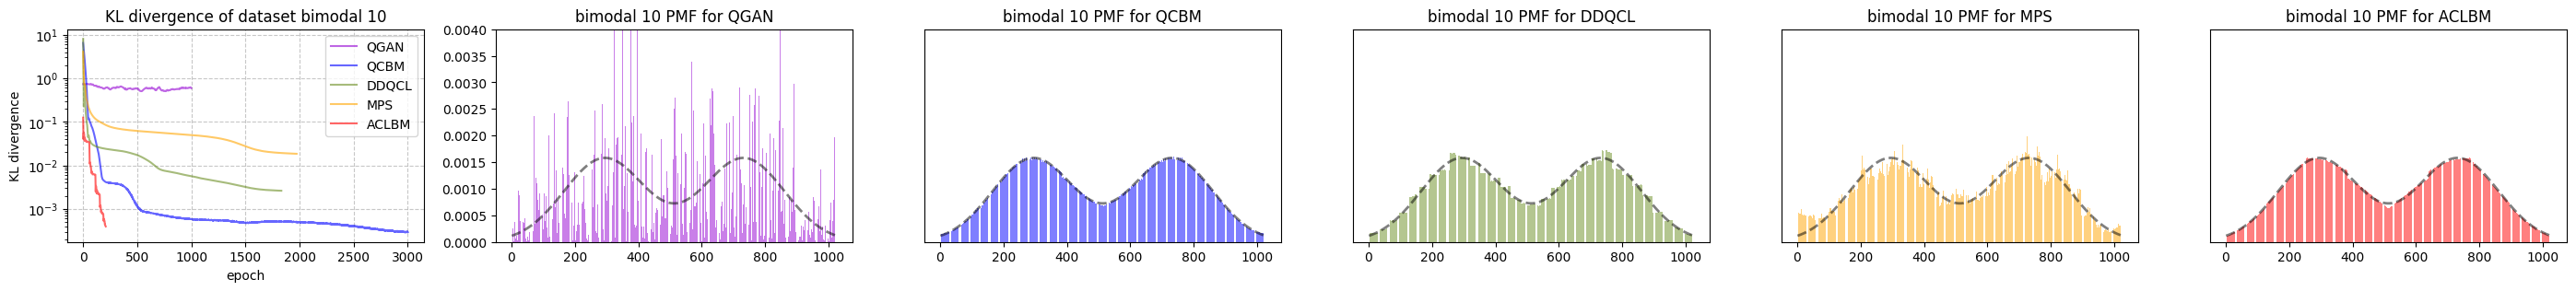

In [76]:
plotter_for_generic_dist(
    qgan_file="./results/QGAN/QGAN(data=bimodal 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM/QCBM(data=bimodal 10, lr=0.005, reps=5)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bimodal 10, lr=0.05, reps=5)",
    mps_file="./results/MPS/MPS(data=bimodal 10, lr=0.01, reps=2)",
    aclbm_file="./results/ACLBM/ACLBM(data=bimodal 10, No=3, t1=0.001, t2=0.005)",
    data="bimodal 10",
)

In [5]:
def plotter_for_bas(qgan_file, qcbm_file, ddqcl_file, mps_file, aclbm_file, data):
    with open(qgan_file + ".json", "rb") as qgan_f, \
        open(qcbm_file + ".json", "rb") as qcbm_f, \
        open(ddqcl_file + ".json", "rb") as ddqcl_f, \
        open(mps_file + ".json", "rb") as mps_f, \
        open(aclbm_file + ".json", "rb") as aclbm_f:
        
        qgan_results = json.load(qgan_f)
        qcbm_results = json.load(qcbm_f)
        ddqcl_results = json.load(ddqcl_f)
        mps_results = json.load(mps_f)
        aclbm_results = json.load(aclbm_f)

        qgan_kl_div = qgan_results['kl div']
        qcbm_kl_div = qcbm_results['kl div']
        ddqcl_kl_div = ddqcl_results['kl div']
        mps_kl_div = mps_results['kl div']
        aclbm_kl_div = aclbm_results['kl div']


        qgan_pmf = qgan_results['pmf']
        qcbm_pmf = qcbm_results['pmf']
        ddqcl_pmf = ddqcl_results['pmf']
        mps_pmf = mps_results['pmf']
        aclbm_pmf = aclbm_results['pmf']
        
    real_pmf = DATA_HUB[data].get_data()

    fig = plt.figure(figsize=(35, 3))
    gs = gridspec.GridSpec(1, 6, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[0, 3])
    ax5 = fig.add_subplot(gs[0, 4])
    ax6 = fig.add_subplot(gs[0, 5])
        
    ax1.semilogy(np.arange(len(qgan_kl_div)) + 1,               qgan_kl_div,               color="darkviolet", label="QGAN", alpha=0.6)
    ax1.semilogy(np.arange(len(qcbm_kl_div)) + 1,               qcbm_kl_div,               color="blue",       label="QCBM", alpha=0.6)
    ax1.semilogy(np.arange(len(ddqcl_kl_div)) + 1,              ddqcl_kl_div,              color="olivedrab",  label="DDQCL", alpha=0.6)
    ax1.semilogy(np.arange(len(mps_kl_div)) + 1,                mps_kl_div,                color="orange",     label="MPS", alpha=0.6)
    ax1.semilogy(np.arange(len(aclbm_kl_div["epoch"])) + 1, aclbm_kl_div["epoch"], color="red",        label="ACLBM", alpha=0.6)
    # ax1.plot(aclbm_kl_indices + 1,                          aclbm_kl_div["epoch"],     ls="",  color="red",        marker="x",   markersize=5)
    # ax1.set_ylim(bottom=0.0)
    ax1.set_title(f"KL divergence of dataset {data}")
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("KL divergence")
    ax1.grid(ls="--", alpha=0.7)
    ax1.legend(loc='upper right')
    
    width = 1
    if data == 'bas 3x3':
        width = 3.0
    elif data == 'bas 4x4':
        width = 200.0

    ax2.bar(np.arange(len(qgan_pmf)) + 1,  real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax2.bar(np.arange(len(qgan_pmf)) + 1,  qgan_pmf,  color="darkviolet",  alpha=0.5, width=width)
    ax2.set_title(f"{data} PMF for QGAN")

    ax3.bar(np.arange(len(qcbm_pmf)) + 1,  real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax3.bar(np.arange(len(qcbm_pmf)) + 1,  qcbm_pmf,  color="blue",        alpha=0.5, width=width)
    ax3.set_title(f"{data} PMF for QCBM")
    ax3.set_yticks([])

    ax4.bar(np.arange(len(ddqcl_pmf)) + 1, real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax4.bar(np.arange(len(ddqcl_pmf)) + 1, ddqcl_pmf, color="olivedrab",   alpha=0.5, width=width)
    ax4.set_title(f"{data} PMF for DDQCL")
    ax4.set_yticks([])
    
    ax5.bar(np.arange(len(mps_pmf)) + 1,   real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax5.bar(np.arange(len(mps_pmf)) + 1,   mps_pmf,   color="orange",      alpha=0.5, width=width)
    ax5.set_title(f"{data} PMF for MPS")
    ax5.set_yticks([])

    ax6.bar(np.arange(len(aclbm_pmf)) + 1, real_pmf,  color="saddlebrown", alpha=0.8, width=width)
    ax6.bar(np.arange(len(aclbm_pmf)) + 1, aclbm_pmf, color="red",         alpha=0.5, width=width)
    ax6.set_title(f"{data} PMF for ACLBM")
    ax6.set_yticks([])
    
    if data == 'bas 2x2':
        top = 0.18
    elif data == 'bas 3x3':
        top = 0.08
    elif data == 'bas 4x4':
        top = 0.04

    ax2.set_ylim(top=top)
    ax3.set_ylim(top=top)
    ax4.set_ylim(top=top)
    ax5.set_ylim(top=top)
    ax6.set_ylim(top=top)

    plt.show()

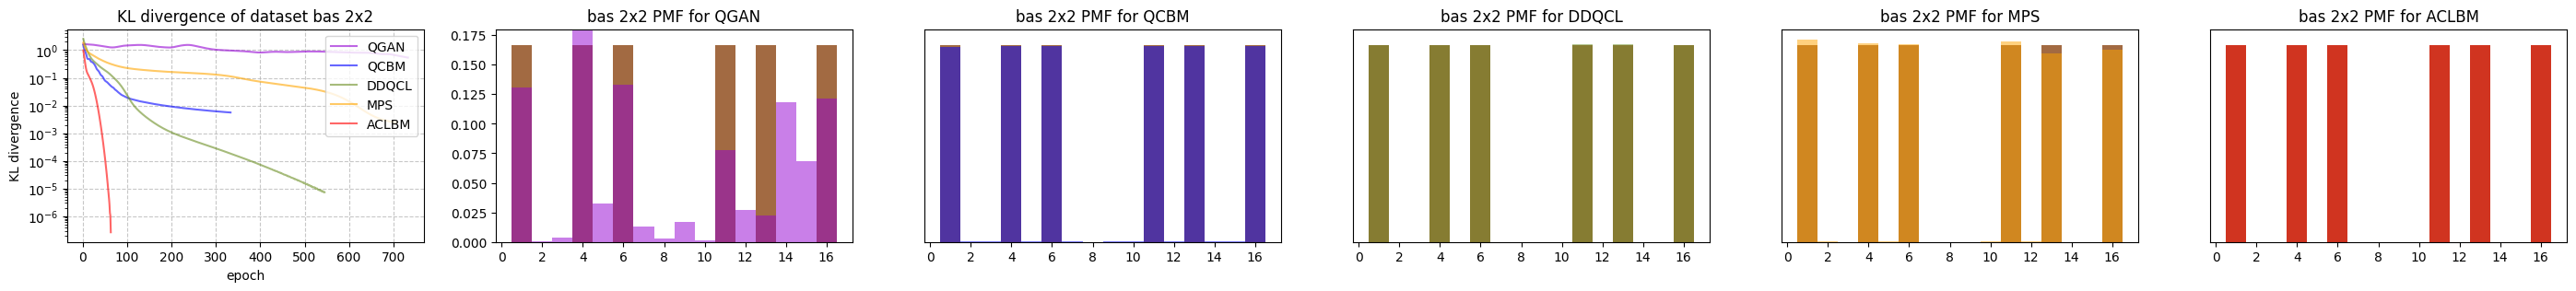

In [6]:
plotter_for_bas(
    qgan_file="./results/QGAN/QGAN(data=bas 2x2, lr=0.002, reps=4)",
    qcbm_file="./results/QCBM/QCBM(data=bas 2x2, lr=0.1, reps=4)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bas 2x2, lr=0.01, reps=4)",
    mps_file="./results/MPS/MPS(data=bas 2x2, lr=0.01, reps=2)",
    aclbm_file="./results/ACLBM/ACLBM(data=bas 2x2, No=10, t1=0.0005, t2=0.0005)",
    data="bas 2x2",
)

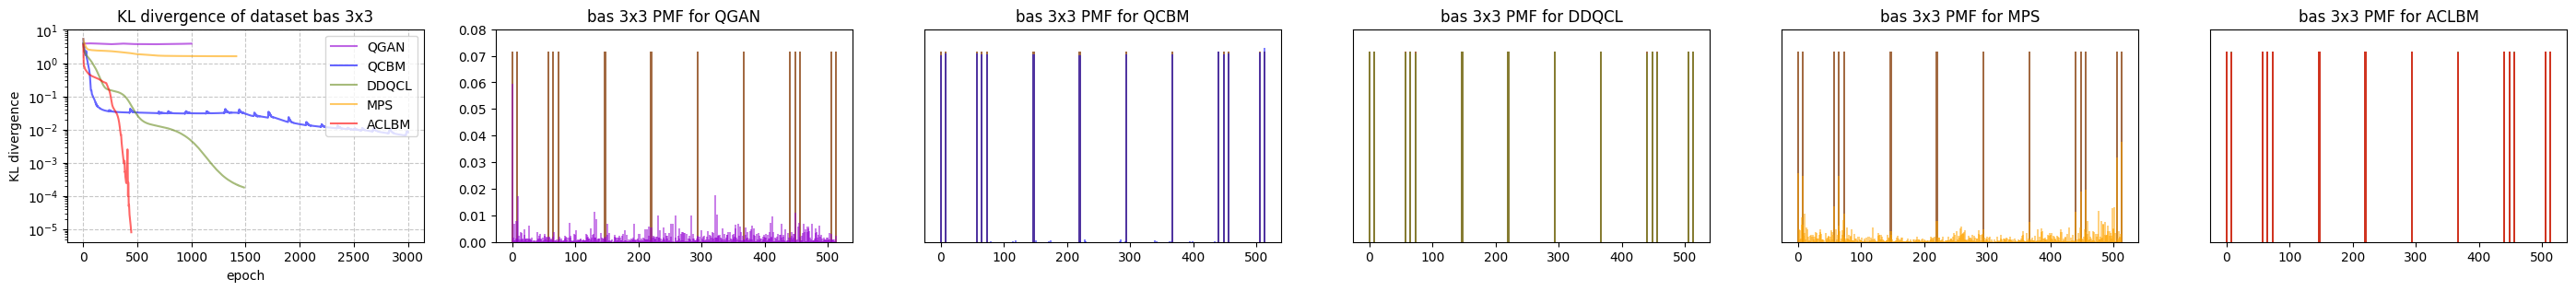

In [7]:
plotter_for_bas(
    qgan_file="./results/QGAN/QGAN(data=bas 3x3, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM/QCBM(data=bas 3x3, lr=0.05, reps=10)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bas 3x3, lr=0.01, reps=10)",
    mps_file="./results/MPS/MPS(data=bas 3x3, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM(data=bas 3x3, No=80, t1=0.0005, t2=0.0005)",
    data="bas 3x3",
)

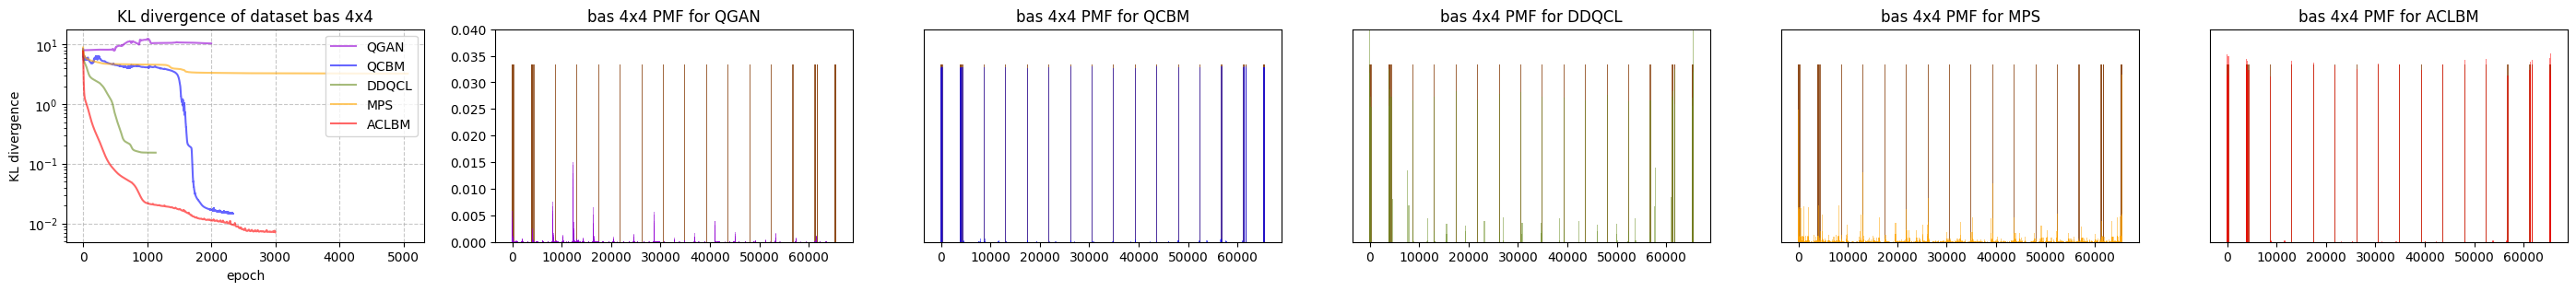

In [6]:
plotter_for_bas(
    qgan_file="./results/QGAN/QGAN(data=bas 4x4, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM/QCBM(data=bas 4x4, lr=0.05, reps=20)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bas 4x4, lr=0.01, reps=20)",
    mps_file="./results/MPS/MPS(data=bas 4x4, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM(data=bas 4x4, No=400, t1=0.0005, t2=0.0005)",
    data="bas 4x4",
)

In [1]:
def plotter_for_real_image(qgan_file, qcbm_file, ddqcl_file, mps_file, aclbm_file, data):
    with open(qgan_file + ".json", "rb") as qgan_f, \
        open(qcbm_file + ".json", "rb") as qcbm_f, \
        open(ddqcl_file + ".json", "rb") as ddqcl_f, \
        open(mps_file + ".json", "rb") as mps_f, \
        open(aclbm_file + ".json", "rb") as aclbm_f:
        
        qgan_results = json.load(qgan_f)
        qcbm_results = json.load(qcbm_f)
        ddqcl_results = json.load(ddqcl_f)
        mps_results = json.load(mps_f)
        aclbm_results = json.load(aclbm_f)

        qgan_kl_div = qgan_results['kl div']
        qcbm_kl_div = qcbm_results['kl div']
        ddqcl_kl_div = ddqcl_results['kl div']
        mps_kl_div = mps_results['kl div']
        aclbm_kl_div = aclbm_results['kl div']

        real_img = np.array(DATA_HUB[data].get_data()).reshape(256, 256)
        qgan_img = np.array(qgan_results['pmf']).reshape(256, 256)
        qcbm_img = np.array(qcbm_results['pmf']).reshape(256, 256)
        ddqcl_img = np.array(ddqcl_results['pmf']).reshape(256, 256)
        mps_img = np.array(mps_results['pmf']).reshape(256, 256)
        aclbm_img = np.array(aclbm_results['pmf']).reshape(256, 256)

    fig = plt.figure(figsize=(30, 3))
    gs = gridspec.GridSpec(1, 15, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0:3])
    ax2 = fig.add_subplot(gs[0, 3:5])
    ax3 = fig.add_subplot(gs[0, 5:7])
    ax4 = fig.add_subplot(gs[0, 7:9])
    ax5 = fig.add_subplot(gs[0, 9:11])
    ax6 = fig.add_subplot(gs[0, 11:13])
    ax7 = fig.add_subplot(gs[0, 13:15])
    
    ax1.semilogy(np.arange(len(qgan_kl_div)) + 1,           qgan_kl_div,           color="darkviolet", label="QGAN", alpha=0.6)
    ax1.semilogy(np.arange(len(qcbm_kl_div)) + 1,           qcbm_kl_div,           color="blue",       label="QCBM", alpha=0.6)
    ax1.semilogy(np.arange(len(ddqcl_kl_div)) + 1,          ddqcl_kl_div,          color="olivedrab",  label="DDQCL", alpha=0.6)
    ax1.semilogy(np.arange(len(mps_kl_div)) + 1,            mps_kl_div,            color="orange",     label="MPS",   alpha=0.6)
    ax1.semilogy(np.arange(len(aclbm_kl_div["epoch"])) + 1, aclbm_kl_div["epoch"], color="red",        label="ACLBM", alpha=0.6)


    ax1.set_title(f"KL divergence of dataset {data}")
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("KL divergence")
    ax1.grid(ls="--", alpha=0.7)
    ax1.legend(loc="upper right")

    ax2.imshow(qgan_img)
    ax2.set_title(f"{data} for QGAN")

    ax3.imshow(qcbm_img)
    ax3.set_title(f"{data} for QCBM")

    ax4.imshow(ddqcl_img)
    ax4.set_title(f"{data} for DDQCL")

    ax5.imshow(mps_img)
    ax5.set_title(f"{data} for MPS")
    
    ax6.imshow(aclbm_img)
    ax6.set_title(f"{data} for ACLBM")

    ax7.imshow(real_img)
    ax7.set_title(f"{data}")

    plt.show()

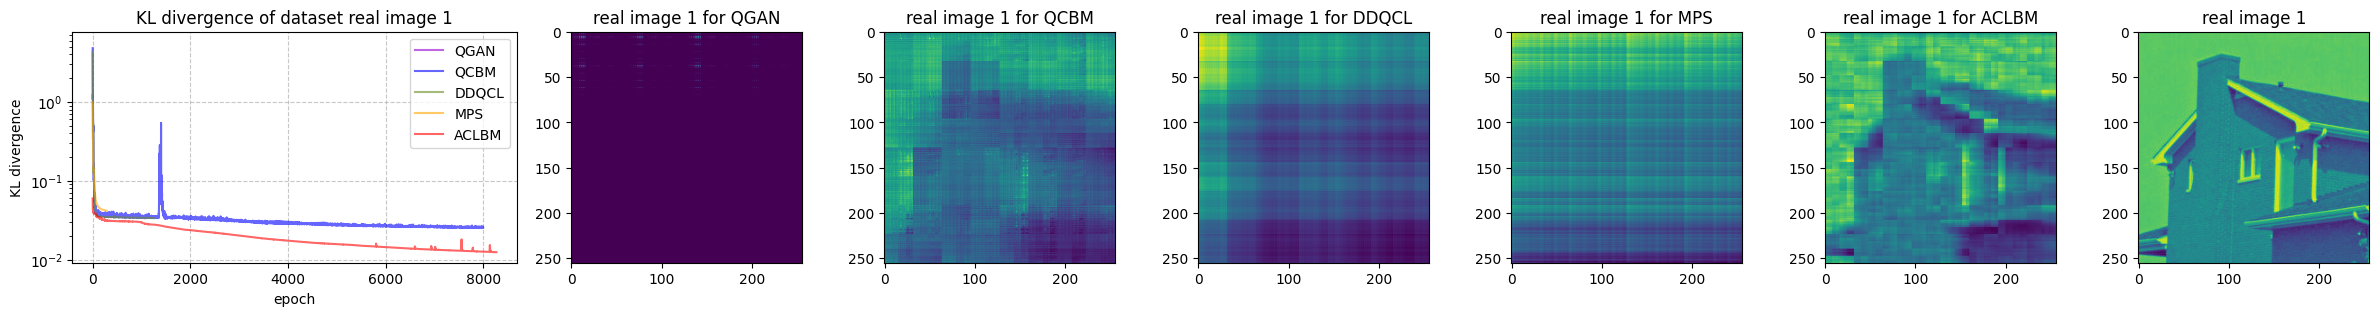

In [24]:
plotter_for_real_image(
    qgan_file="./results/QGAN/QGAN(data=real image 1, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM/QCBM(data=real image 1, lr=0.05, reps=20)",
    ddqcl_file="./results/DDQCL/DDQCL(data=real image 1, lr=0.01, reps=20)",
    mps_file="./results/MPS/MPS(data=real image 1, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM-Fisher-Rao(data=real image 1, No=3, t1=0.001, t2=0.005)",
    data="real image 1"
)

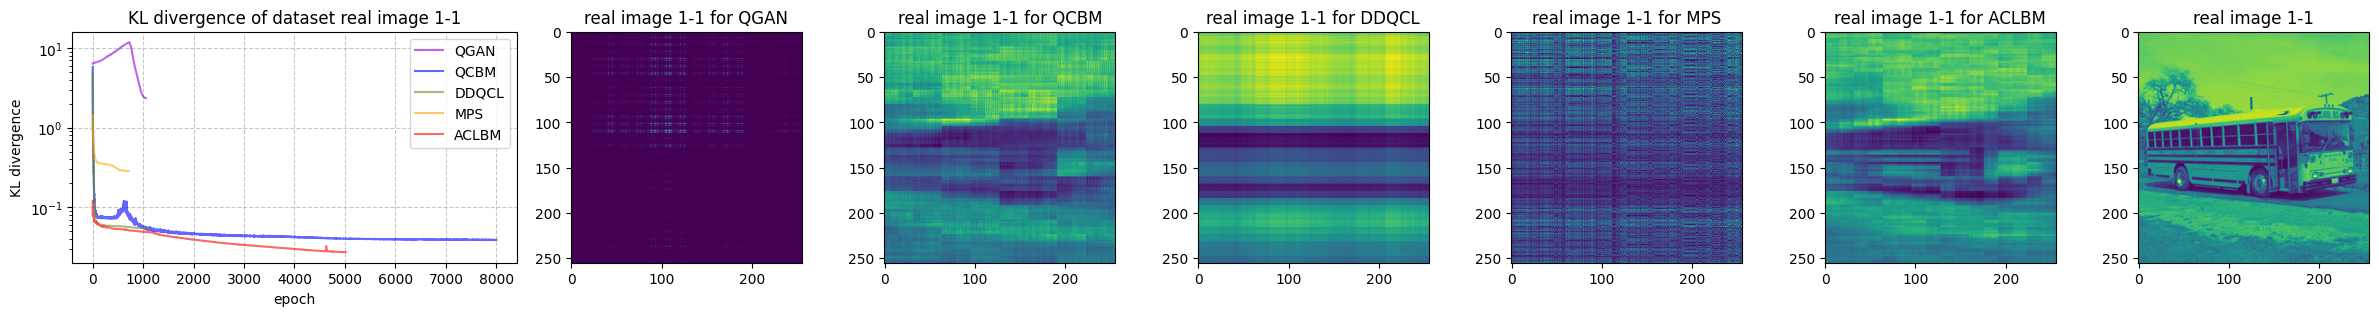

In [10]:
plotter_for_real_image(
    qgan_file="./results/QGAN/QGAN(data=real image 1-1, lr=0.0001, reps=20)",
    qcbm_file="./results/QCBM/QCBM(data=real image 1-1, lr=0.05, reps=20)",
    ddqcl_file="./results/DDQCL/DDQCL(data=real image 1-1, lr=0.01, reps=20)",
    mps_file="./results/MPS/MPS(data=real image 1-1, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM-Fisher-Rao(data=real image 1-1, No=3, t1=0.001, t2=0.005)",
    data="real image 1-1"
)

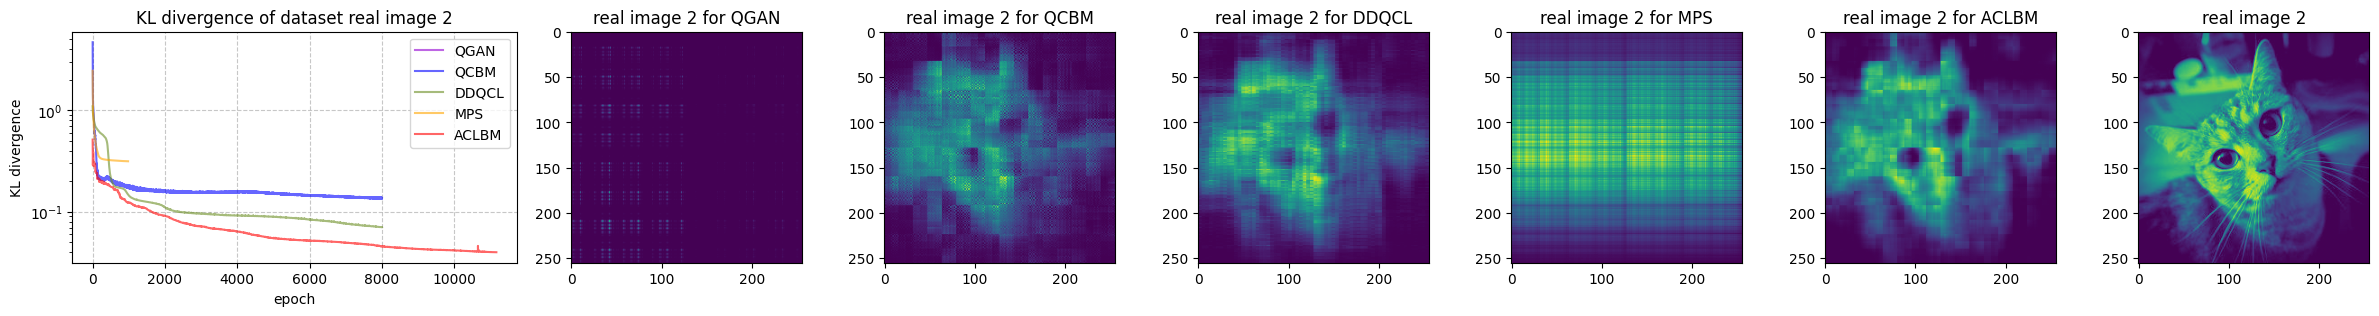

In [25]:
plotter_for_real_image(
    qgan_file="./results/QGAN/QGAN(data=real image 2, lr=0.001, reps=30)",
    qcbm_file="./results/QCBM/QCBM(data=real image 2, lr=0.05, reps=30)",
    ddqcl_file="./results/DDQCL/DDQCL(data=real image 2, lr=0.01, reps=30)",
    mps_file="./results/MPS/MPS(data=real image 2, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM-Fisher-Rao(data=real image 2, No=3, t1=0.001, t2=0.005)",
    data="real image 2"
)

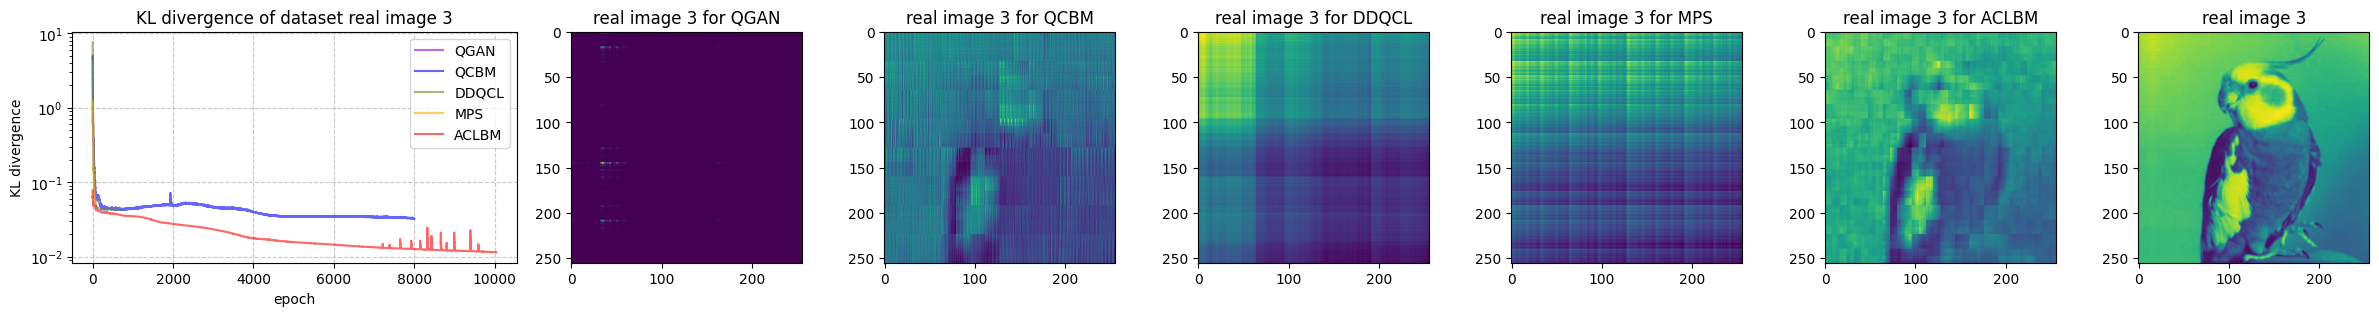

In [26]:
plotter_for_real_image(
    qgan_file="./results/QGAN/QGAN(data=real image 3, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM/QCBM(data=real image 3, lr=0.05, reps=20)",
    ddqcl_file="./results/DDQCL/DDQCL(data=real image 3, lr=0.01, reps=20)",
    mps_file="./results/MPS/MPS(data=real image 3, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM-Fisher-Rao(data=real image 3, No=3, t1=0.001, t2=0.005)",
    data="real image 3"
)

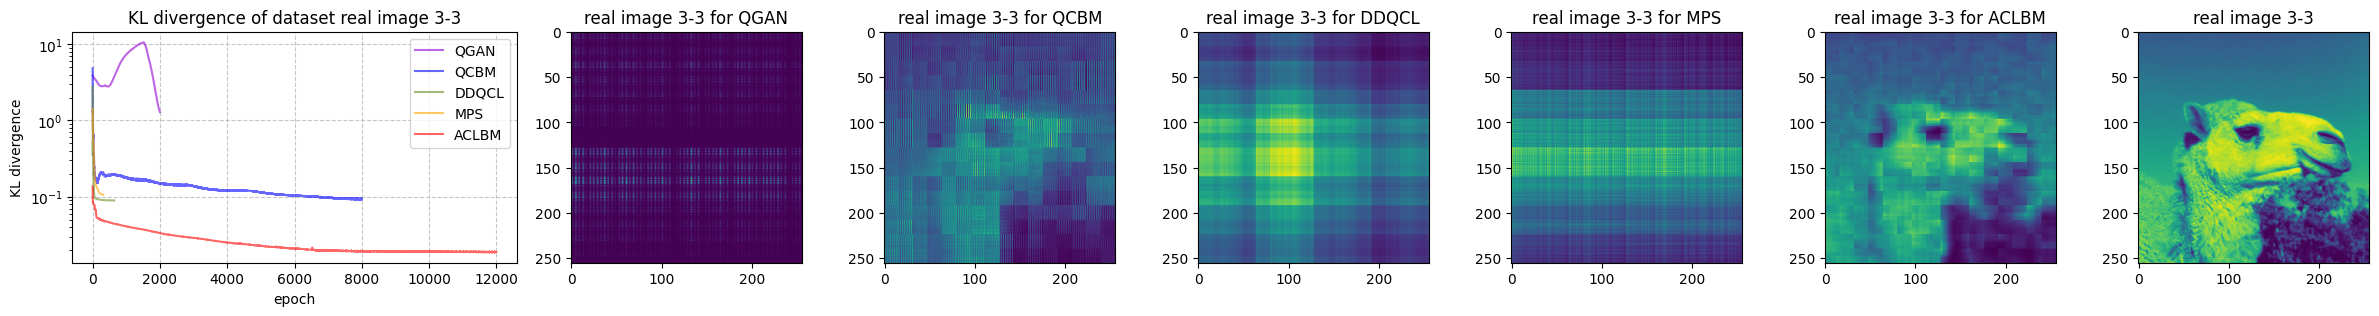

In [11]:
plotter_for_real_image(
    qgan_file="./results/QGAN/QGAN(data=real image 3-3, lr=0.0001, reps=20)",
    qcbm_file="./results/QCBM/QCBM(data=real image 3-3, lr=0.05, reps=20)",
    ddqcl_file="./results/DDQCL/DDQCL(data=real image 3-3, lr=0.01, reps=20)",
    mps_file="./results/MPS/MPS(data=real image 3-3, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM-Fisher-Rao(data=real image 3-3, No=3, t1=0.001, t2=0.005)",
    data="real image 3-3"
)

In [19]:
import json

def print_result(qgan_file, qcbm_file, ddqcl_file, mps_file, aclbm_file):
    with open(qgan_file + ".json", "rb") as qgan_f, \
        open(qcbm_file + ".json", "rb") as qcbm_f, \
        open(ddqcl_file + ".json", "rb") as ddqcl_f, \
        open(mps_file + ".json", "rb") as mps_f, \
        open(aclbm_file + ".json", "rb") as aclbm_f:
        
        qgan_results = json.load(qgan_f)
        qcbm_results = json.load(qcbm_f)
        ddqcl_results = json.load(ddqcl_f)
        mps_results = json.load(mps_f)
        aclbm_results = json.load(aclbm_f)
        
        print("QGAN KL divergence: ", qgan_results['kl div'][-1])
        print("QCBM KL divergence: ", qcbm_results['kl div'][-1])
        print("DDQCL KL divergence: ", ddqcl_results['kl div'][-1])
        print("MPS KL divergence: ", mps_results['kl div'][-1])
        print("ACLBM KL divergence: ", aclbm_results['kl div']['epoch'][-1])
        
        print("G loss: ", qgan_results['loss history']['g loss'][-1], " D loss: ", qgan_results['loss history']['d loss'][-1])
        print("log MMD loss", qcbm_results['loss history'][-1])
        print("KL divergence", ddqcl_results['loss history'][-1])
        print("KL divergence", mps_results['loss history'][-1])
        print("KL divergence", aclbm_results['loss history']['epoch'][-1])

In [11]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=log normal 3, lr=0.01, reps=3)",
    qcbm_file="./results/QCBM/QCBM(data=log normal 3, lr=0.1, reps=3)",
    ddqcl_file="./results/DDQCL/DDQCL(data=log normal 3, lr=0.01, reps=3)",
    mps_file="./results/MPS/MPS(data=log normal 3, lr=0.01, reps=1)",
    aclbm_file="./results/ACLBM/ACLBM(data=log normal 3, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  0.008247944331462009
QCBM KL divergence:  0.000523487469343809
DDQCL KL divergence:  0.0011415465288161057
MPS KL divergence:  2.1133485590639207e-06
ACLBM KL divergence:  2.552565649536337e-06
G loss:  0.6941496307877163  D loss:  0.6931165809138762
log MMD loss 3.032350674044908e-07
KL divergence 0.0011415465288161057
KL divergence 2.1133485590639207e-06
KL divergence 2.552565649536337e-06


In [12]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=bimodal 3, lr=0.01, reps=3)",
    qcbm_file="./results/QCBM/QCBM(data=bimodal 3, lr=0.1, reps=3)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bimodal 3, lr=0.01, reps=3)",
    mps_file="./results/MPS/MPS(data=bimodal 3, lr=0.01, reps=1)",
    aclbm_file="./results/ACLBM/ACLBM(data=bimodal 3, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  0.005767249839778221
QCBM KL divergence:  -2.231648451072963e-07
DDQCL KL divergence:  1.2934511993509311e-05
MPS KL divergence:  5.454034453457974e-05
ACLBM KL divergence:  5.38087139938408e-06
G loss:  0.6929682825065406  D loss:  0.693148945153125
log MMD loss 3.7776606824573076e-10
KL divergence 1.2934511993509311e-05
KL divergence 5.454034453457974e-05
KL divergence 5.38087139938408e-06


In [34]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=triangular 3, lr=0.01, reps=3)",
    qcbm_file="./results/QCBM/QCBM(data=triangular 3, lr=0.1, reps=3)",
    ddqcl_file="./results/DDQCL/DDQCL(data=triangular 3, lr=0.01, reps=3)",
    mps_file="./results/MPS/MPS(data=triangular 3, lr=0.01, reps=1)",
    aclbm_file="./results/ACLBM/ACLBM(data=triangular 3, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  0.04809641299570604
QCBM KL divergence:  0.0005539562905203203
DDQCL KL divergence:  2.204677161205058e-05
MPS KL divergence:  7.612883874386512e-05
ACLBM KL divergence:  2.2013083101032112e-06
G loss:  0.7186426696718631  D loss:  0.6851340345309777
log MMD loss 1.880890913108305e-07
KL divergence 2.204677161205058e-05
KL divergence 7.612883874386512e-05
KL divergence 2.2013083101032112e-06


In [22]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=log normal 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM/QCBM(data=log normal 10, lr=0.005, reps=5)",
    ddqcl_file="./results/DDQCL/DDQCL(data=log normal 10, lr=0.05, reps=5)",
    mps_file="./results/MPS/MPS(data=log normal 10, lr=0.01, reps=2)",
    aclbm_file="./results/ACLBM/ACLBM(data=log normal 10, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  0.34807658978340283
QCBM KL divergence:  0.007826184688462213
DDQCL KL divergence:  0.004133182823495357
MPS KL divergence:  0.0345821428982304
ACLBM KL divergence:  0.00032492731416053095
G loss:  0.7570684810704955  D loss:  0.6762305602592209
log MMD loss -17.722728277010216
KL divergence 0.004133182823495357
KL divergence 0.0345821428982304
KL divergence 0.0003248564606661681


In [35]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=bimodal 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM/QCBM(data=bimodal 10, lr=0.005, reps=5)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bimodal 10, lr=0.05, reps=5)",
    mps_file="./results/MPS/MPS(data=bimodal 10, lr=0.01, reps=2)",
    aclbm_file="./results/ACLBM/ACLBM(data=bimodal 10, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  0.9437535816641668
QCBM KL divergence:  0.00029161222376189667
DDQCL KL divergence:  0.0026122866803220753
MPS KL divergence:  0.018443366482428444
ACLBM KL divergence:  0.00039493157357501914
G loss:  0.6666426100860141  D loss:  0.7263036684256315
log MMD loss -19.83825690477604
KL divergence 0.0026122866803220753
KL divergence 0.018443366482428444
KL divergence 0.00039493157357501914


In [38]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=triangular 10, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM/QCBM(data=triangular 10, lr=0.005, reps=5)",
    ddqcl_file="./results/DDQCL/DDQCL(data=triangular 10, lr=0.05, reps=5)",
    mps_file="./results/MPS/MPS(data=triangular 10, lr=0.01, reps=2)",
    aclbm_file="./results/ACLBM/ACLBM(data=triangular 10, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  0.5451699978967057
QCBM KL divergence:  0.0006638750723029548
DDQCL KL divergence:  0.006299143284980406
MPS KL divergence:  0.019317195096931444
ACLBM KL divergence:  0.0005795536497425783
G loss:  0.7702294314305991  D loss:  0.6670263285883068
log MMD loss -20.5671706244288
KL divergence 0.006299143284980406
KL divergence 0.019317195096931444
KL divergence 0.0005795536497425783


In [13]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=bas 2x2, lr=0.002, reps=4)",
    qcbm_file="./results/QCBM/QCBM(data=bas 2x2, lr=0.1, reps=4)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bas 2x2, lr=0.01, reps=4)",
    mps_file="./results/MPS/MPS(data=bas 2x2, lr=0.01, reps=2)",
    aclbm_file="./results/ACLBM/ACLBM(data=bas 2x2, No=10, t1=0.0005, t2=0.0005)",
)

QGAN KL divergence:  0.5396637913078468
QCBM KL divergence:  0.005594836123673423
DDQCL KL divergence:  7.359858065718165e-06
MPS KL divergence:  0.0024211915715859436
ACLBM KL divergence:  2.634065626491226e-07
G loss:  0.7298382105090531  D loss:  0.6932069166030375
log MMD loss 5.444837589671377e-06
KL divergence 7.359858065718165e-06
KL divergence 0.0024211915715859436
KL divergence 2.634065626491226e-07


In [17]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=bas 3x3, lr=0.001, reps=10)",
    qcbm_file="./results/QCBM/QCBM(data=bas 3x3, lr=0.05, reps=10)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bas 3x3, lr=0.01, reps=10)",
    mps_file="./results/MPS/MPS(data=bas 3x3, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM(data=bas 3x3, No=80, t1=0.0005, t2=0.0005)",
)

QGAN KL divergence:  3.8629124972133697
QCBM KL divergence:  0.00833846754044149
DDQCL KL divergence:  0.00018068736187465433
MPS KL divergence:  1.6142066702600872
ACLBM KL divergence:  8.093657098099943e-06
G loss:  0.6967368036630855  D loss:  0.6905252673326977
log MMD loss 1.63016661370209e-05
KL divergence 0.00018068736187465433
KL divergence 1.6142066702600872
KL divergence 8.093657098099943e-06


In [20]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=bas 4x4, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM/QCBM(data=bas 4x4, lr=0.05, reps=20)",
    ddqcl_file="./results/DDQCL/DDQCL(data=bas 4x4, lr=0.01, reps=20)",
    mps_file="./results/MPS/MPS(data=bas 4x4, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM(data=bas 4x4, No=300, t1=0.0005, t2=0.0005)",
)

QGAN KL divergence:  10.459510934808364
QCBM KL divergence:  0.014571912740310645
DDQCL KL divergence:  0.15368789373390568
MPS KL divergence:  3.2621115901684865
ACLBM KL divergence:  0.01802735350411442
G loss:  0.005394363930193897  D loss:  13.061204193530665
log MMD loss 1.0442454546724092e-05
KL divergence 0.15367149151297604
KL divergence 3.2621115901684865
KL divergence 0.01802735350411442


In [12]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=real image 1, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM/QCBM(data=real image 1, lr=0.05, reps=20)",
    ddqcl_file="./results/DDQCL/DDQCL(data=real image 1, lr=0.01, reps=20)",
    mps_file="./results/MPS/MPS(data=real image 1, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM-Fisher-Rao(data=real image 1, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  3.5244810785315703
QCBM KL divergence:  0.025521019297625964
DDQCL KL divergence:  0.03373265174649388
MPS KL divergence:  0.041840293582137957
ACLBM KL divergence:  0.012433743376628654
G loss:  0.6943256821514763  D loss:  0.6899691999872093
log MMD loss -18.55301043351701
KL divergence 0.03373265174649388
KL divergence 0.041840293582137957
KL divergence 0.07893774046504529


In [16]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=real image 2, lr=0.001, reps=30)",
    qcbm_file="./results/QCBM/QCBM(data=real image 2, lr=0.05, reps=30)",
    ddqcl_file="./results/DDQCL/DDQCL(data=real image 2, lr=0.01, reps=30)",
    mps_file="./results/MPS/MPS(data=real image 2, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM-Fisher-Rao(data=real image 2, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  2.9610058358242615
QCBM KL divergence:  0.13692823198738618
DDQCL KL divergence:  0.0705706766627681
MPS KL divergence:  0.3146880344283124
ACLBM KL divergence:  0.039957221773308085
G loss:  0.00038858765443589054  D loss:  13.798240369909328
log MMD loss -17.305079394168114
KL divergence 0.07055937849035633
KL divergence 0.3146880344283124
KL divergence 0.14419835329182146


In [19]:
print_result(
    qgan_file="./results/QGAN/QGAN(data=real image 3, lr=0.001, reps=20)",
    qcbm_file="./results/QCBM/QCBM(data=real image 3, lr=0.05, reps=20)",
    ddqcl_file="./results/DDQCL/DDQCL(data=real image 3, lr=0.01, reps=20)",
    mps_file="./results/MPS/MPS(data=real image 3, lr=0.01, reps=3)",
    aclbm_file="./results/ACLBM/ACLBM-Fisher-Rao(data=real image 3, No=3, t1=0.001, t2=0.005)",
)

QGAN KL divergence:  4.591427719642021
QCBM KL divergence:  0.03244194942932431
DDQCL KL divergence:  0.04274308397804109
MPS KL divergence:  0.05485901127716257
ACLBM KL divergence:  0.011461871244968766
G loss:  0.03001663406217206  D loss:  13.33647581411479
log MMD loss -19.246829193264894
KL divergence 0.04274308397804109
KL divergence 0.05485901127716257
KL divergence 0.07655778678999073


In [47]:
def print_aclbm_info(aclbm_file):
    with open(aclbm_file + ".json", "rb") as aclbm_f:
        aclbm_results = json.load(aclbm_f)
        num_param = len(aclbm_results['kl div']['iteration'])
        print(num_param)

In [48]:
print_aclbm_info(aclbm_file="./results/ACLBM/ACLBM(data=log normal 10, No=3, t1=0.001, t2=0.005)")

37


In [49]:
print_aclbm_info(aclbm_file="./results/ACLBM/ACLBM(data=bimodal 10, No=3, t1=0.001, t2=0.005)")

11


In [50]:
print_aclbm_info(aclbm_file="./results/ACLBM/ACLBM(data=triangular 10, No=3, t1=0.001, t2=0.005)")

25
